In [1]:
import pandas as pd
import numpy as np

In [2]:
env_df = pd.read_csv("environmental factors.csv")
env_df.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [3]:
env_df.isna().sum()

temperature         0
humidity            0
wind_speed          0
carbon_emissions    0
solar_irradiance    0
pollution_level     0
dtype: int64

In [4]:
#Selecting the input features
X = env_df[['temperature', 'humidity',]].values
X

array([[22.49080238, 52.41844911],
       [34.01428613, 49.97472577],
       [29.63987884, 40.56923475],
       ...,
       [33.9341583 , 48.22190815],
       [22.94975985, 56.59920039],
       [19.34280808, 40.33588886]], shape=(10000, 2))

In [5]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.cluster import KMeans
env_cluster_model = KMeans(n_clusters = 3, init = 'k-means++',
                            random_state = 42)
env_df["Cluster"] = env_cluster_model.fit_predict(X_scaled)
env_df.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level,Cluster
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658,0
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704,1
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561,0
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179,1
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814,2


In [7]:
#Choosing the optimal number of clusters with Elbow method
wcss = []
for k in range(1, 11):
  kmeans_model = KMeans(n_clusters = k, init = 'k-means++',
                            random_state = 42)
  kmeans_model.fit_predict(X_scaled)
  wcss.append(kmeans_model.inertia_)
print(wcss)

[19999.999999999996, 12517.049500824281, 7944.3941788043885, 5047.543251735222, 4276.437018389524, 3623.504015924193, 3075.8585187034855, 2608.091364139912, 2405.033135919333, 2027.7602581729404]


C:\Users\Avantee Sarve\AppData\Local\Temp\ipykernel_4312\2743298430.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


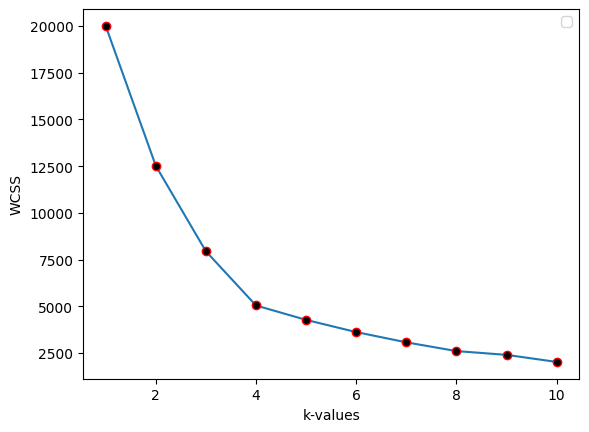

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, marker = 'o', mfc = 'k', mec = 'r')
plt.xlabel("k-values")
plt.ylabel("WCSS")
plt.legend()
plt.show()

In [9]:
env_df.columns

Index(['temperature', 'humidity', 'wind_speed', 'carbon_emissions',
       'solar_irradiance', 'pollution_level', 'Cluster'],
      dtype='object')

<Axes: xlabel='temperature', ylabel='humidity'>

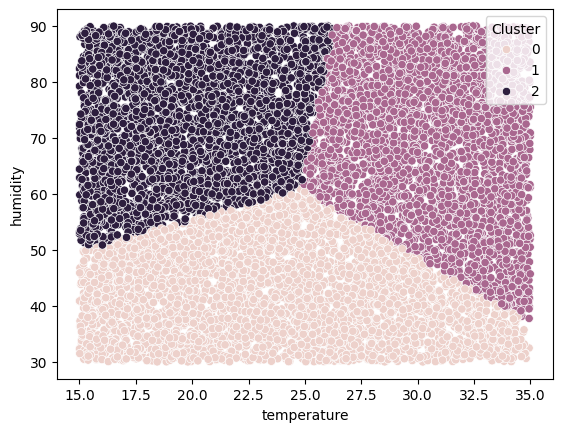

In [10]:
import seaborn as sns
sns.scatterplot(x = 'temperature', y = 'humidity',
                data = env_df, hue = 'Cluster')

In [11]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, env_df['Cluster'])

In [12]:
sil_score

0.3750503201863511